## San Francisco Crime Classification


#### Goal:  Predict the category of crimes that occurred in the city by the bay

<b>About The Project</b>
<br>
This dataset contains incidents derived from SFPD Crime Incident Reporting system. The data ranges from 1/1/2003 to 5/13/2015. The training set and test set rotate every week, meaning week 1,3,5,7... belong to test set, week 2,4,6,8 belong to training set.
<br>
This dataset is provided by [SF OpenData](https://datasf.org/opendata/), the central clearinghouse for data published by the City and County of San Francisco.

#### Data Science/Analaysis Process

1. EDA (Exploartory Data Analysis)
2. Data cleaning and preprocessing
3. Machine Learning Models
4. Best Hyperparameters
5. Interpretation

![sf crime](pic.png)

#### Data Set
- Training Data Set - 878049 rows / 9 columns
- Test Data Set - 884262 rows / 7 columns (No Descript/Resolution Columns)

#### Data Columns
- Dates - timestamp of the crime incident
- Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.
- Descript - detailed description of the crime incident (only in train.csv)
- DayOfWeek - the day of the week
- PdDistrict - name of the Police Department District
- Resolution - how the crime incident was resolved (only in train.csv)
- Address - the approximate street address of the crime incident 
- X - Longitude
- Y - Latitude

In [1]:
import pandas as pd

In [2]:
# Import training data set 
train = pd.read_csv("data/train.csv")
print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
# Import test data set
test = pd.read_csv("data/test.csv")
print(test.shape)
test.head()

(884262, 7)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


## EDA Exploartory Data Analysis

- Test data set doens't have Descript and Resolution Columns. The two columns are not used.
- Understanding the data in visualization

In [4]:
# Visualization Packages 
%matplotlib inline

import seaborn as sns

import matplotlib.pyplot as plt

In [5]:
# Data Type Check 
print("Training Data Info Below ")
print(train.info())
print("---------------------------------------------------------------")
print("Test Data Info Below ")
print(test.info())

Training Data Info Below 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB
None
---------------------------------------------------------------
Test Data Info Below 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
Id            884262 non-null int64
Dates         884262 non-null object
DayOfWeek     884262 non-null object
PdDistrict    884262 non-null object
Address       884262 non-null object
X             884262 non-null float64
Y             884262 non-null float64
dtypes: float64

### 1. Date Column Anlaysis & Visualization

From Visualization To Insights

1. Low frequency early in the moring
2. Abnormal pattern in Dates-minute
3. Incorrect Date-second columns


In [6]:
# Change Data Type From str To datetime

train["Dates"] = pd.to_datetime(train["Dates"])
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

print(train.shape)

train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(878049, 15)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


In [7]:
# Change Data Type From str To datetime
test["Dates"] = pd.to_datetime(test["Dates"])


test["Dates-year"] = test["Dates"].dt.year
test["Dates-month"] = test["Dates"].dt.month
test["Dates-day"] = test["Dates"].dt.day
test["Dates-hour"] = test["Dates"].dt.hour
test["Dates-minute"] = test["Dates"].dt.minute
test["Dates-second"] = test["Dates"].dt.second

print(test.shape)

test[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(884262, 13)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-10 23:59:00,2015,5,10,23,59,0
1,2015-05-10 23:51:00,2015,5,10,23,51,0
2,2015-05-10 23:50:00,2015,5,10,23,50,0
3,2015-05-10 23:45:00,2015,5,10,23,45,0
4,2015-05-10 23:45:00,2015,5,10,23,45,0


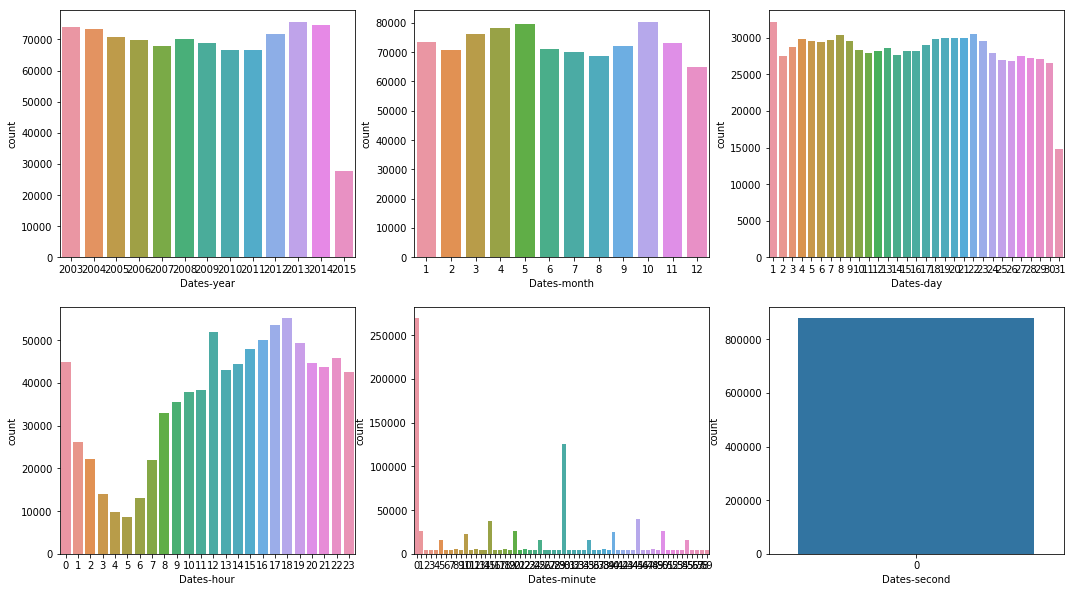

In [8]:
# Date Data Visualization
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

sns.countplot(data=train, x="Dates-year", ax=ax1)
sns.countplot(data=train, x="Dates-month", ax=ax2)
sns.countplot(data=train, x="Dates-day", ax=ax3)
sns.countplot(data=train, x="Dates-hour", ax=ax4)
sns.countplot(data=train, x="Dates-minute", ax=ax5)
sns.countplot(data=train, x="Dates-second", ax=ax6)

### 2. DayOfWeek Analysis & Visualization

From Visualization To Insights

1. Unqiue pattern by specific criminals
2. Different pattern by weekdays and weekend 

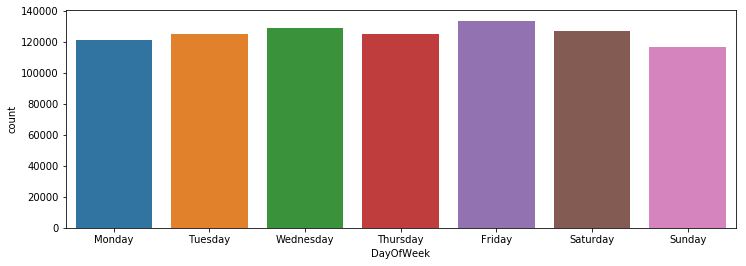

In [9]:
# Plot DayOfWeek
plt.figure(figsize = (12, 4))

dayofweek_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.countplot(data = train, x = "DayOfWeek", order = dayofweek_list)

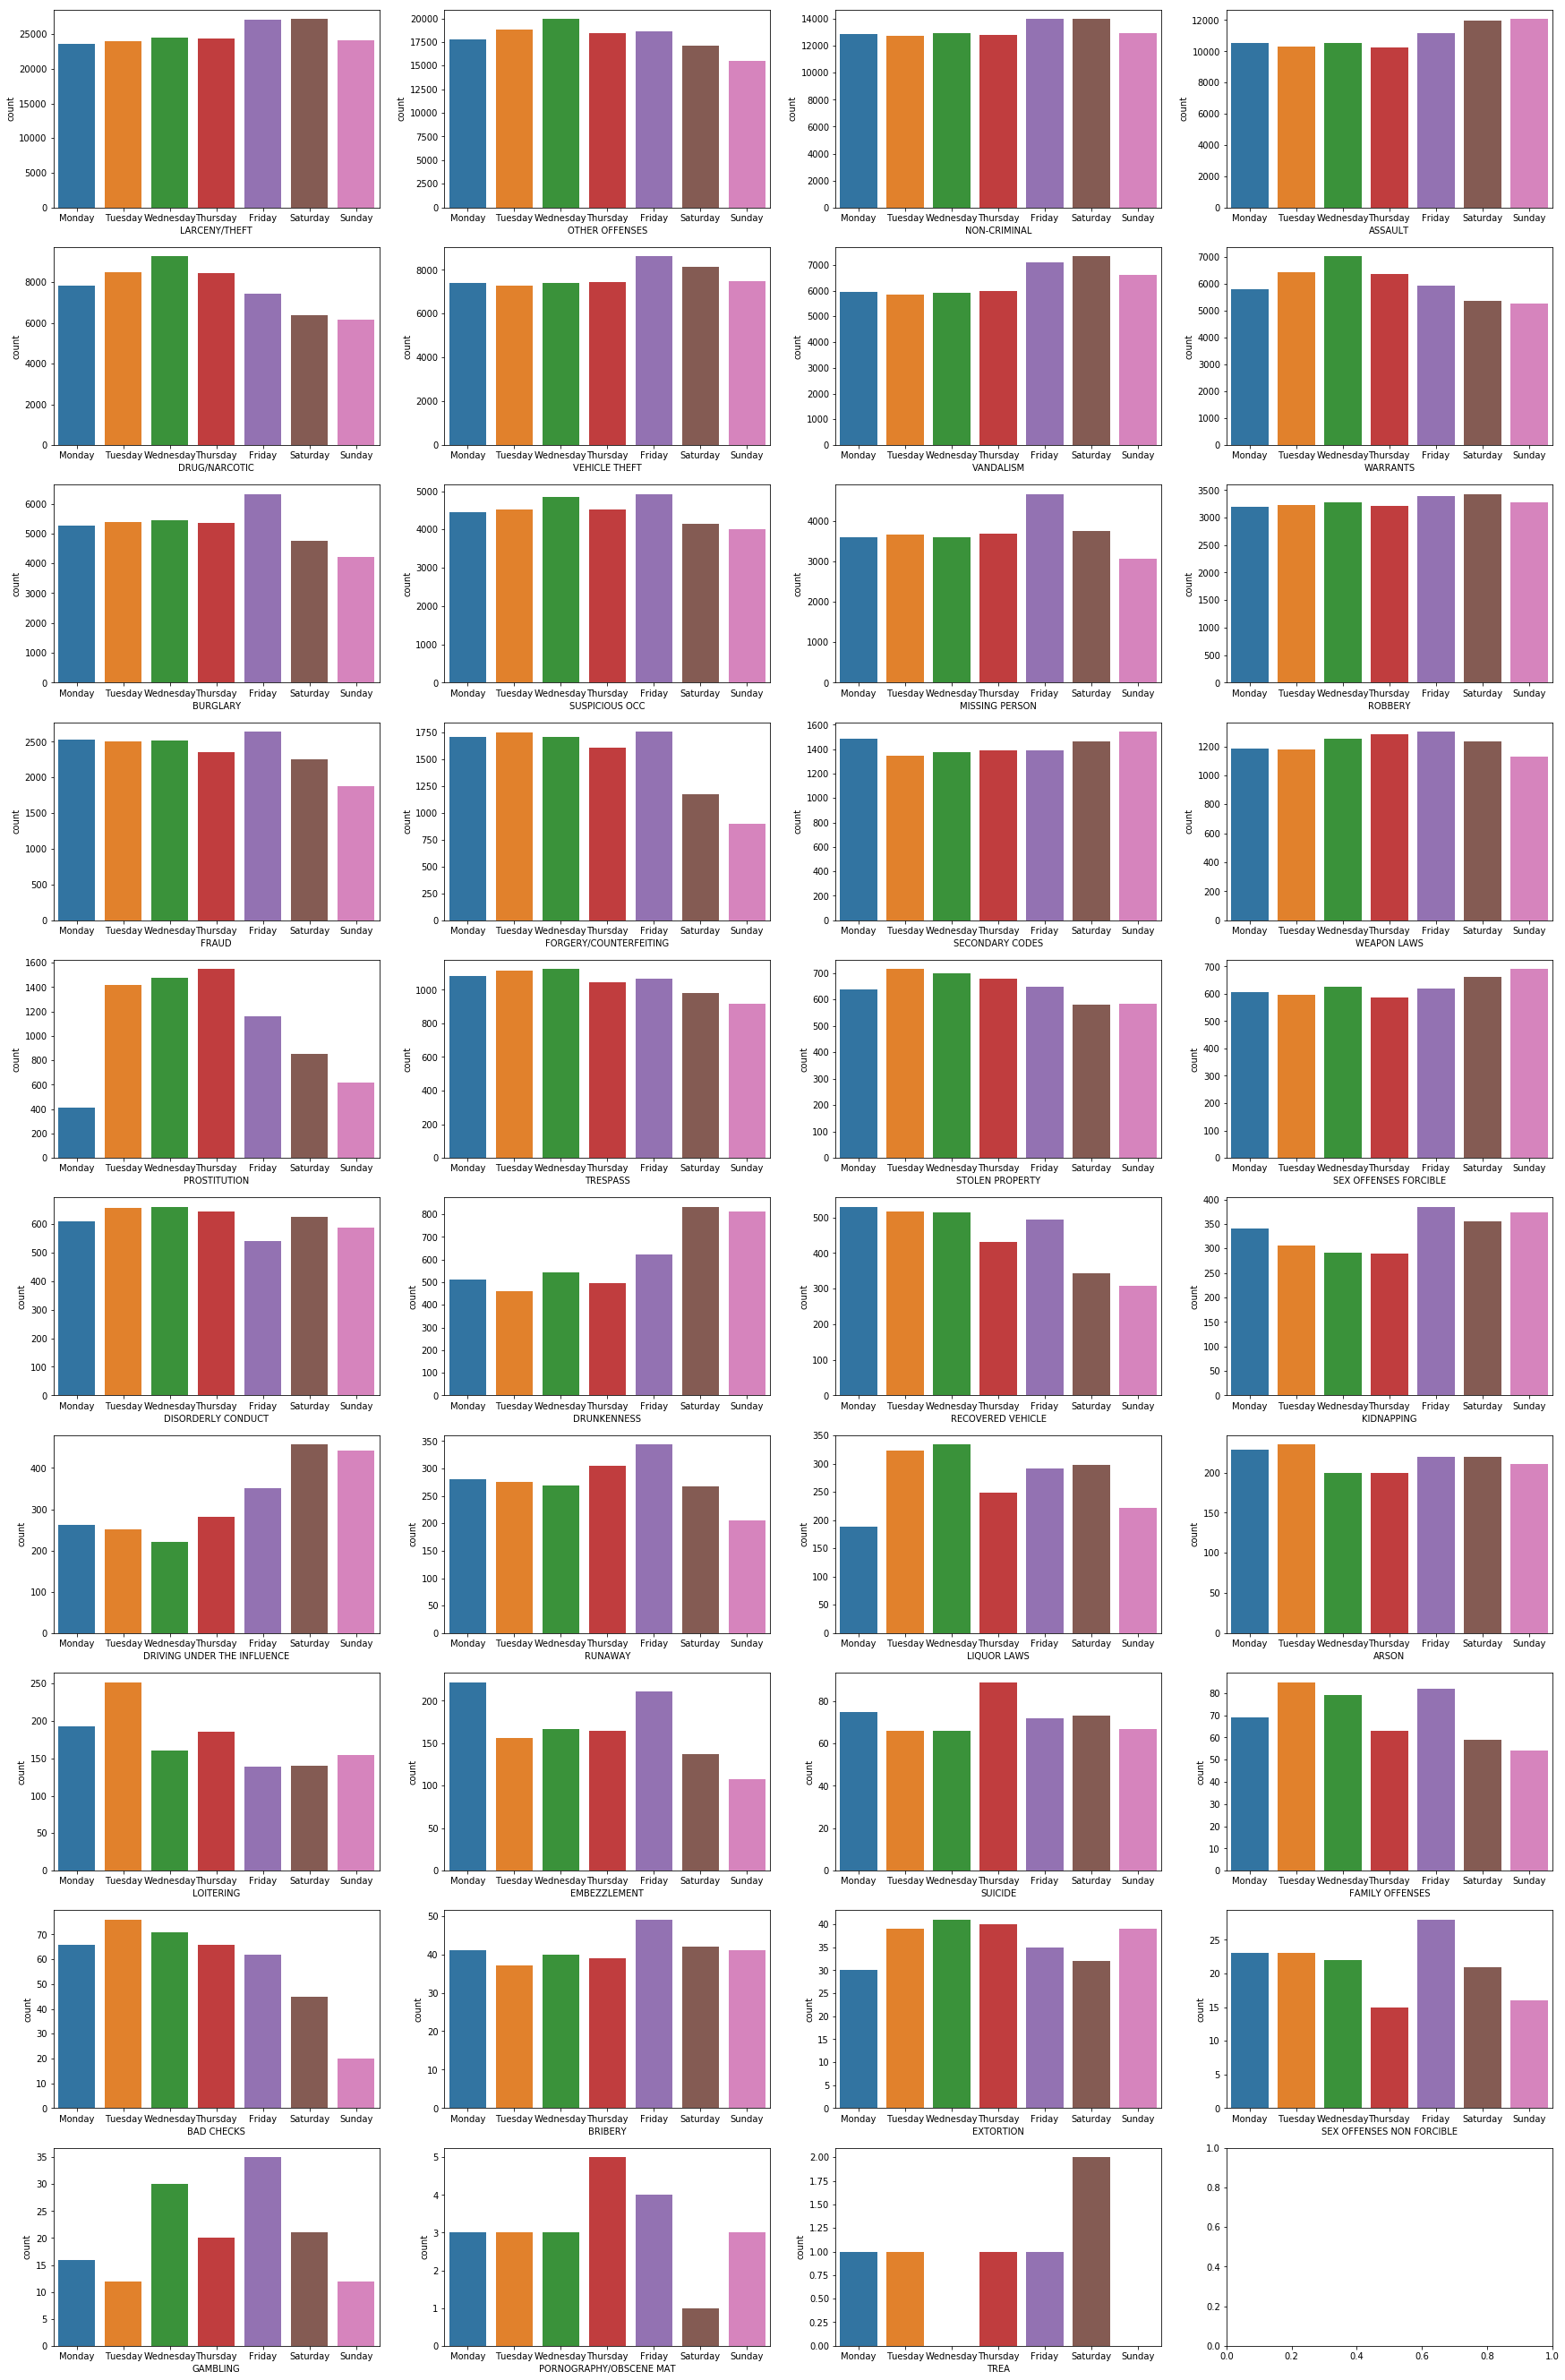

In [10]:
# Criminal categories Analysis based on Day of Week

figure, axes = plt.subplots(nrows = 10, ncols = 4)

figure.set_size_inches(30, 48)

category_list = train["Category"].value_counts().index


for row in range(10):

    for column in range(4):
        
        index = row * 4 + column
        
       
        if index < len(category_list):
            
            ax = axes[row][column]

           
            category = category_list[index]
        
           
            target = train[train["Category"] == category]

            sns.countplot(data = target, x = "DayOfWeek", order = dayofweek_list, ax = ax)

            ax.set(xlabel = category)


### 3. PdDistrict Anlaysis & Visualization


From Visualization To Insights

1. Specific regions have a lots criminals
2. Unqiue pattern by specific criminals

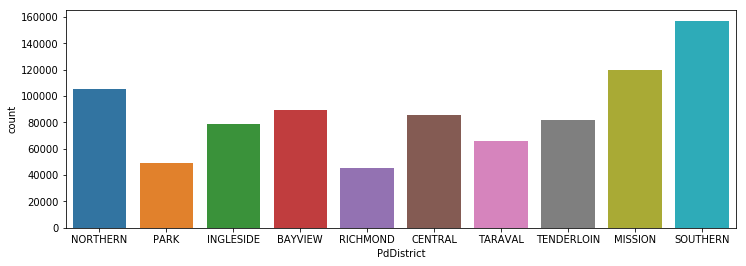

In [11]:
# Plot PdDistrict
plt.figure(figsize = (12, 4))

sns.countplot(data = train, x = "PdDistrict")

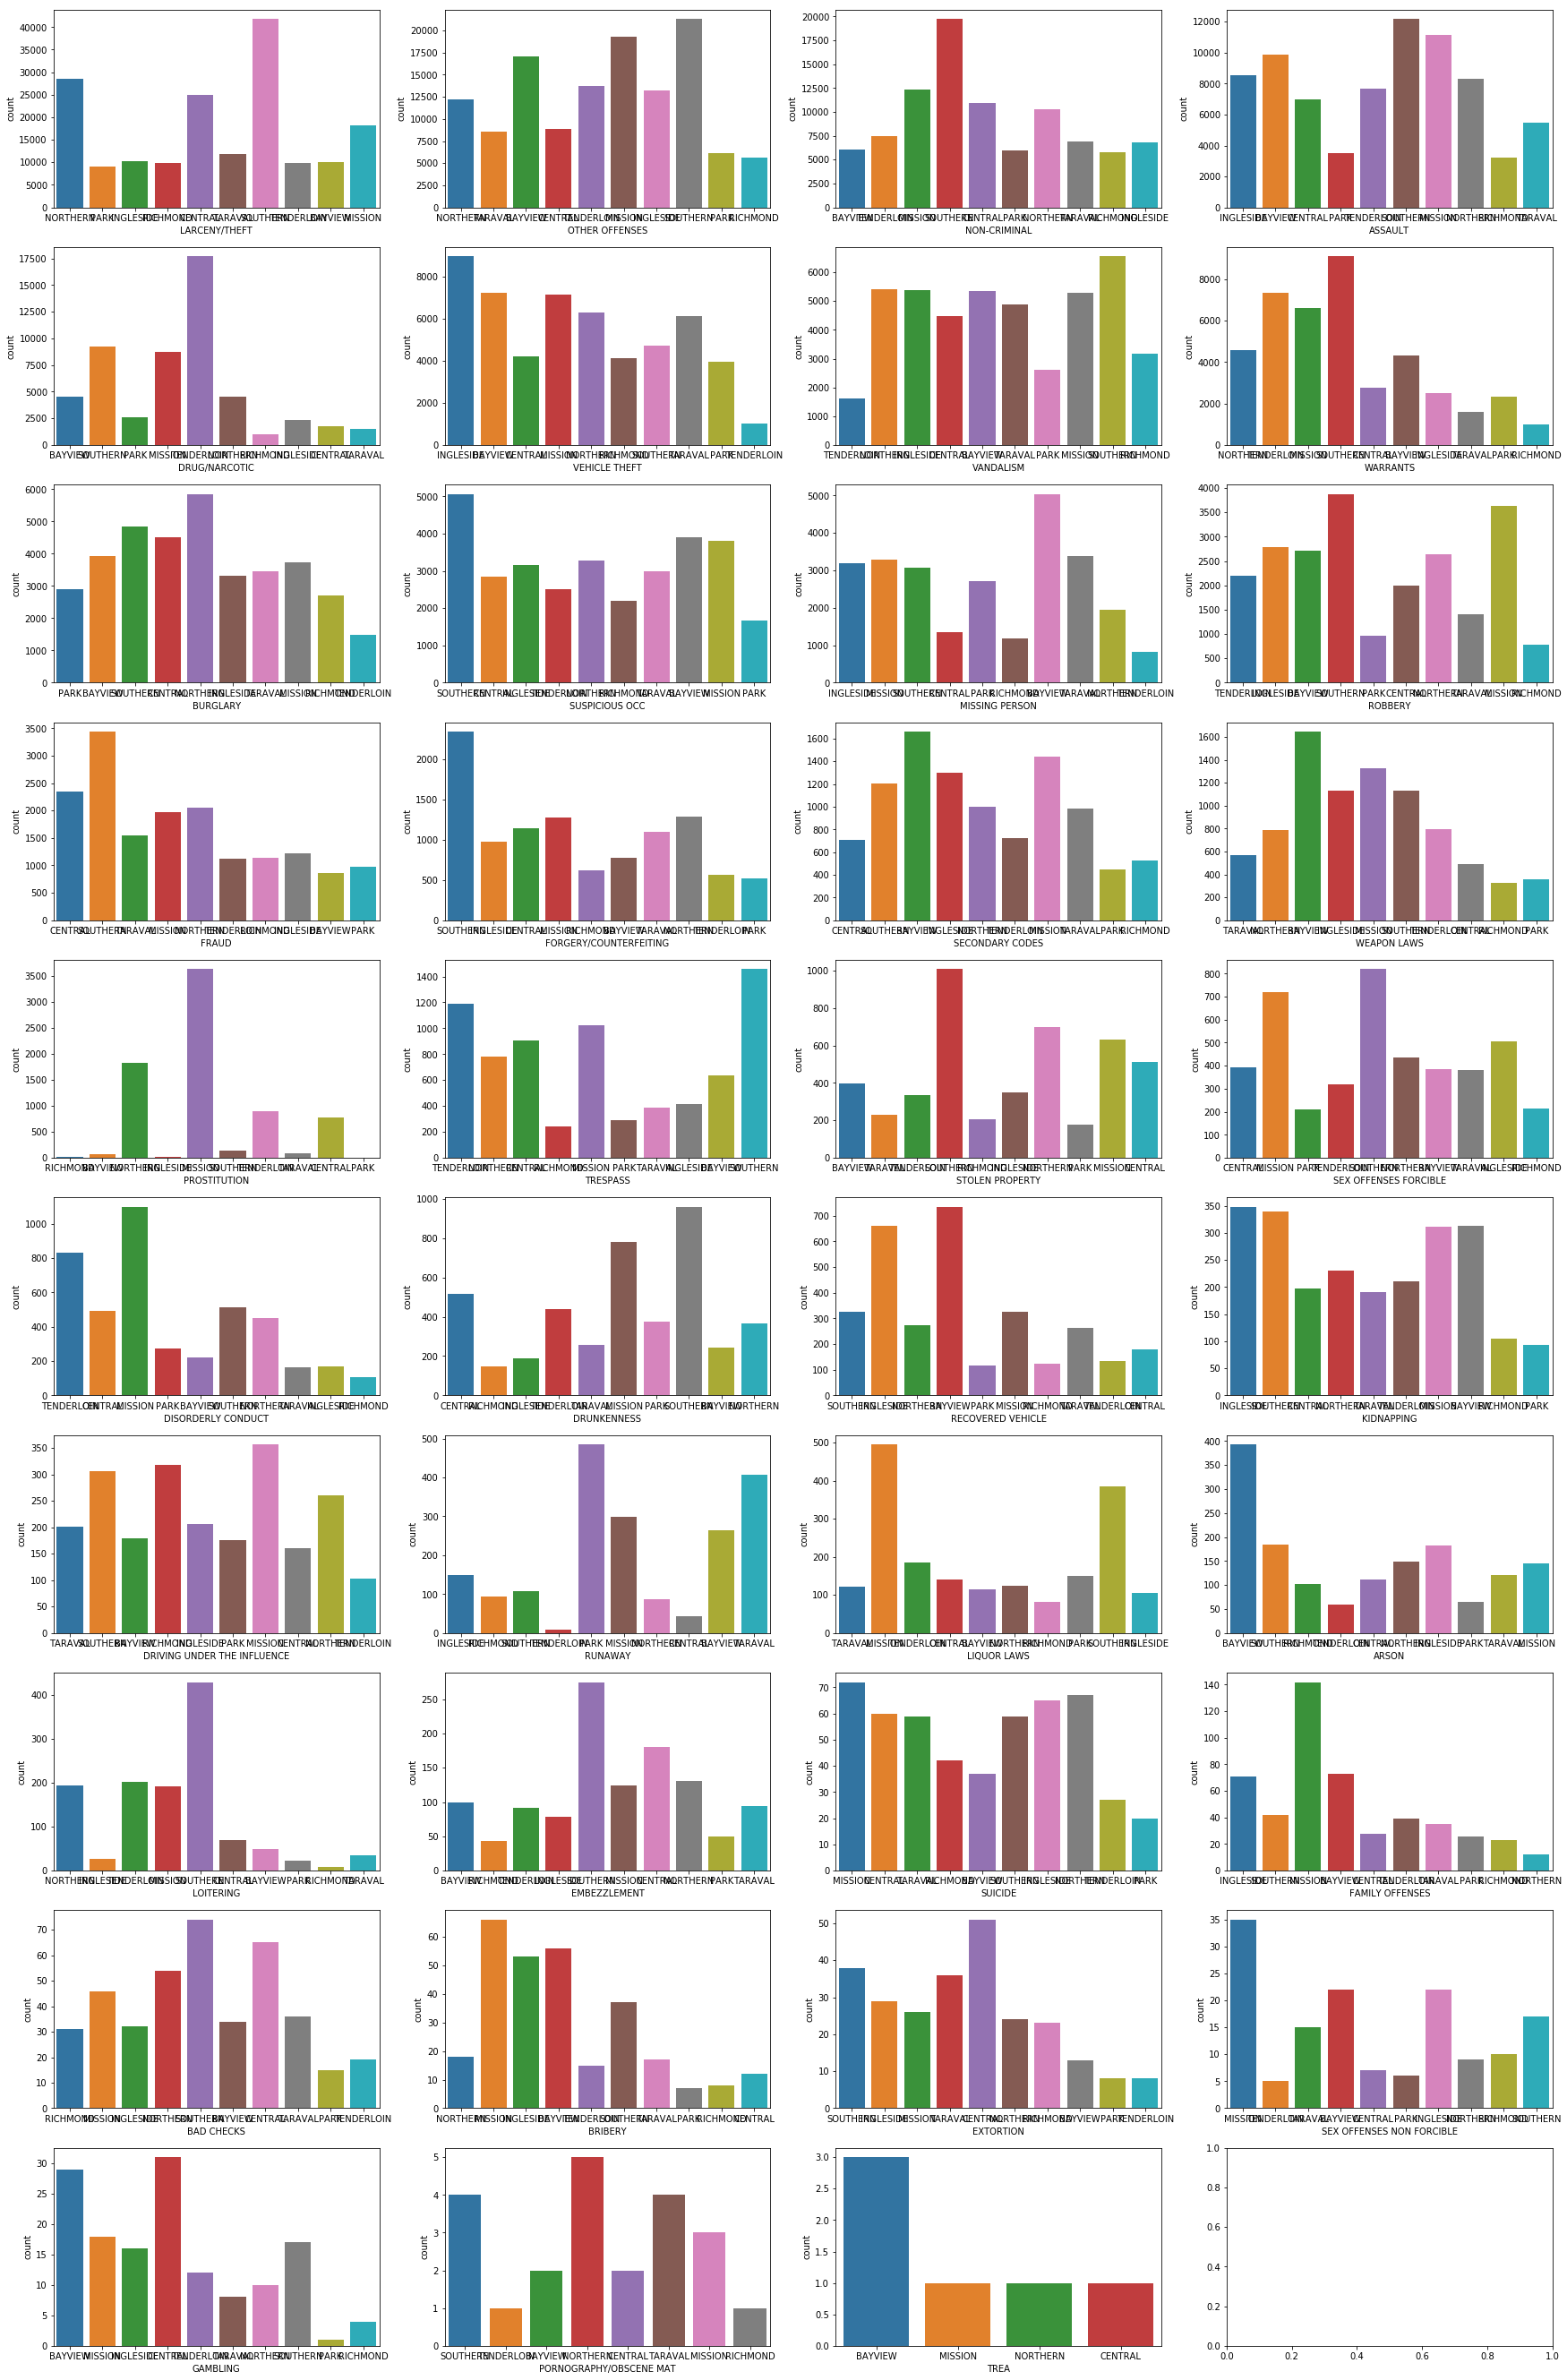

In [12]:
# Criminal categories Analysis based on PD

figure, axes = plt.subplots(nrows = 10, ncols = 4)


figure.set_size_inches(30, 48)

category_list = train["Category"].value_counts().index


for row in range(10):
   
    for column in range(4):
        
        index = row * 4 + column
      
        if index < len(category_list):
           
            ax = axes[row][column]

            
            category = category_list[index]
        
         
            target = train[train["Category"] == category]
            
            sns.countplot(data = target, x = "PdDistrict", ax = ax)

            ax.set(xlabel = category)

## Data cleaning and preprocessing

### 1. Address Column Analysis

- Seperate Address Column by Crossroad
- Assumption: Whether crossroad or not has a correlation with specific criminals.

In [13]:
# Seperate Address columns
train["Crossroad"] = train["Address"].str.contains("/")

print(train.shape)
train[["Address", "Crossroad"]].head()

(878049, 16)


,Address,Crossroad
0,OAK ST / LAGUNA ST,True
1,OAK ST / LAGUNA ST,True
2,VANNESS AV / GREENWICH ST,True
3,1500 Block of LOMBARD ST,False
4,100 Block of BRODERICK ST,False


In [14]:
test["Crossroad"] = test["Address"].str.contains("/")

print(test.shape)
test[["Address", "Crossroad"]].head()

(884262, 14)


,Address,Crossroad
0,2000 Block of THOMAS AV,False
1,3RD ST / REVERE AV,True
2,2000 Block of GOUGH ST,False
3,4700 Block of MISSION ST,False
4,4700 Block of MISSION ST,False


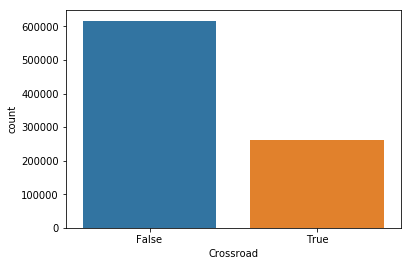

In [15]:
sns.countplot(data=train, x="Crossroad")

### 1.1 Visualize it and check if crossroad has a correlation with criminals. 

- The correlation can be seen in the counterplot.
- Crossroad column should be counted as a valueable feature.

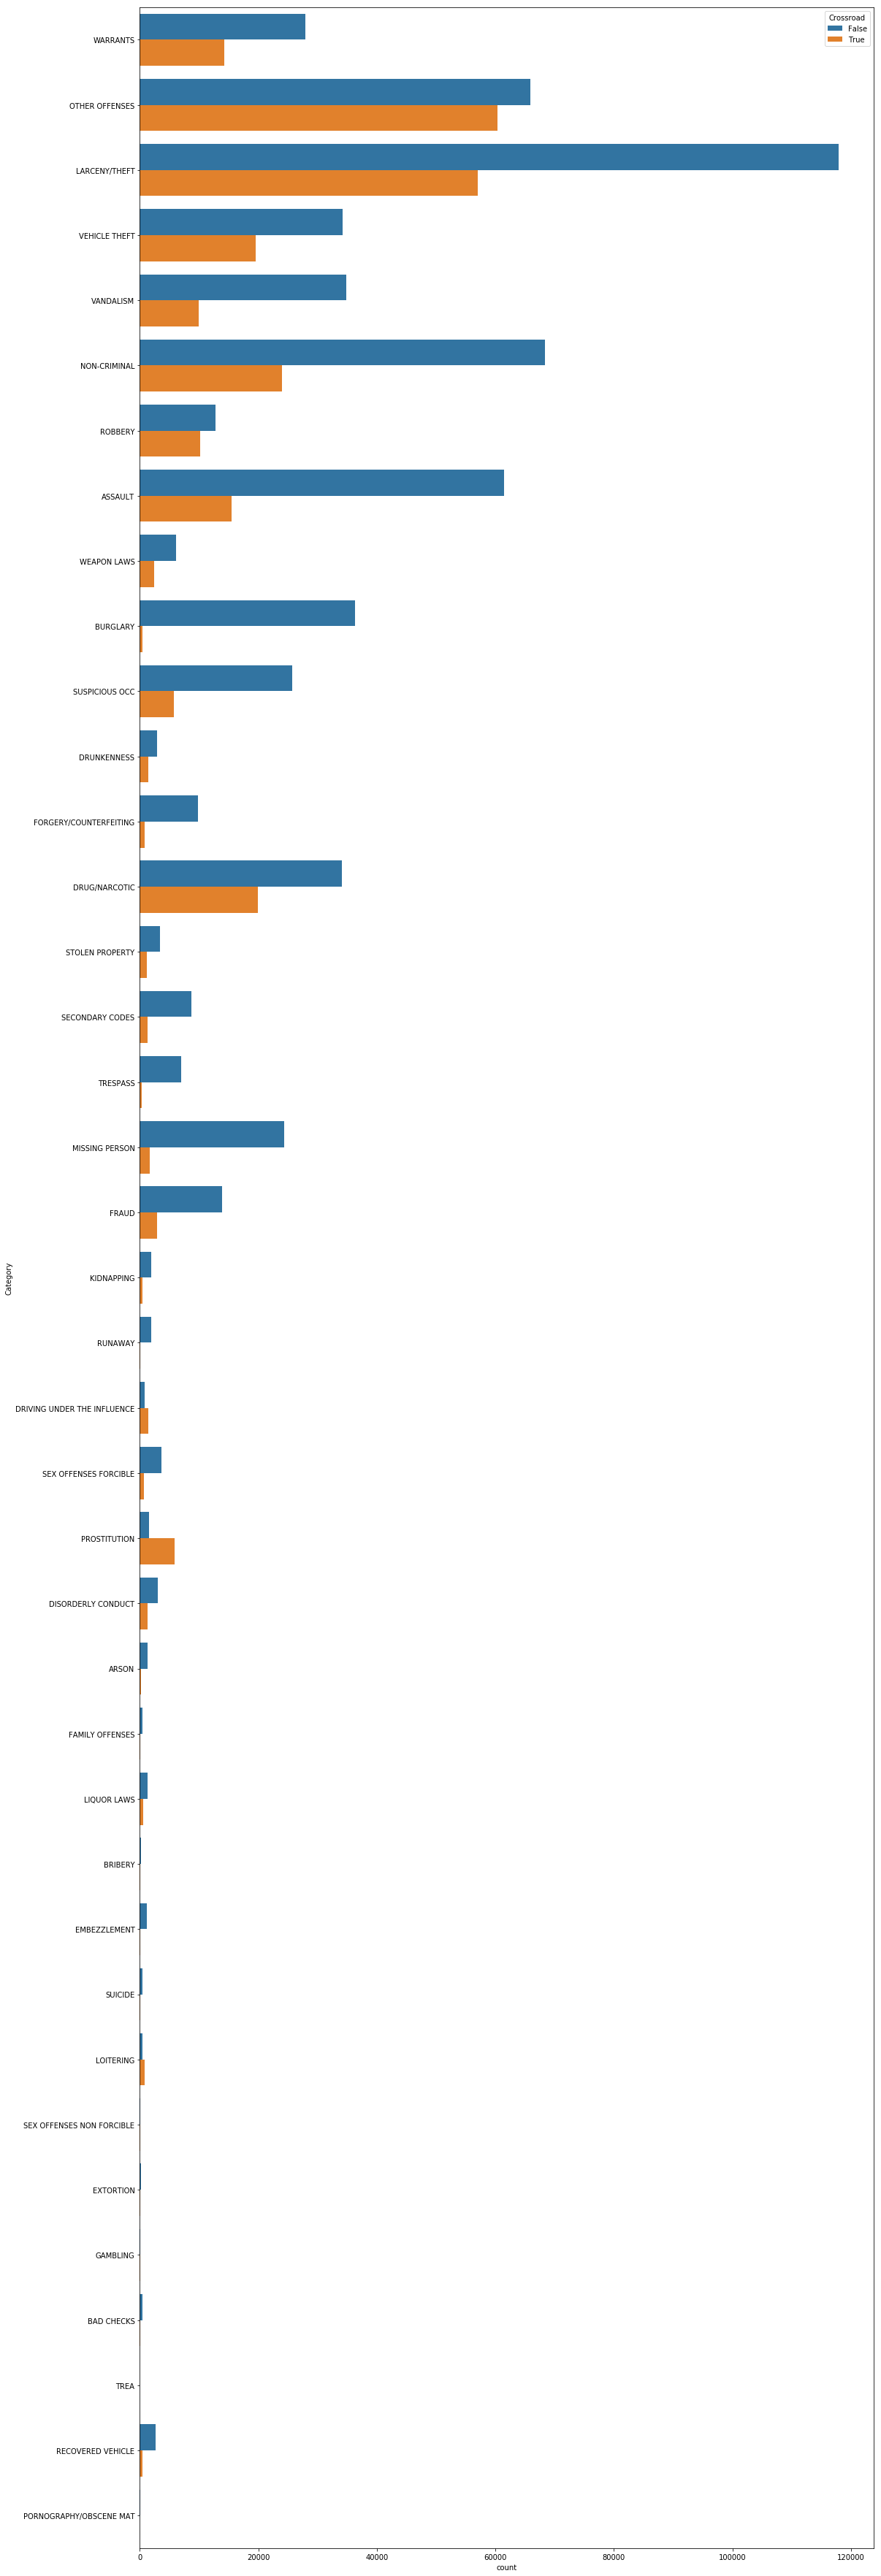

In [16]:
plt.figure(figsize = (18, 64))

sns.countplot(data=train, hue="Crossroad", y="Category")

### 2. Creating Weekend Columns
- Weekend column can be made by Friday and Saturday or Saturday and Sunday.

In [17]:
# Weekend Columns
weekend_FS = ['Friday', 'Saturday']
weekend_SS = ['Sunday', 'Saturday']
train['Weekend_FS'] = False
train['Weekend_SS'] = False
test['Weekend_FS'] = False
test['Weekend_FS'] = False
train.loc[train['DayOfWeek'].isin(weekend_FS), "Weekend_FS"] = True
train.loc[train['DayOfWeek'].isin(weekend_SS), "Weekend_SS"] = True
test.loc[test['DayOfWeek'].isin(weekend_FS), "Weekend_FS"] = True
test.loc[test['DayOfWeek'].isin(weekend_SS), "Weekend_SS"] = True

### 3. DayOfWeek Encoding 

- One Hot Encoding

In [18]:
# one hot encoding for day of week in training data set
train_dayofweek = pd.get_dummies(train["DayOfWeek"], prefix = "DayOfWeek")

train = pd.concat([train, train_dayofweek], axis = 1)

print(train.shape)
train.head()

(878049, 25)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,Crossroad,Weekend_FS,Weekend_SS,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,True,False,False,0,0,0,0,0,0,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,True,False,False,0,0,0,0,0,0,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,True,False,False,0,0,0,0,0,0,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,False,False,False,0,0,0,0,0,0,1
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,False,False,False,0,0,0,0,0,0,1


In [19]:
test_dayofweek = pd.get_dummies(test["DayOfWeek"], prefix = "DayOfWeek")


test = pd.concat([test, test_dayofweek], axis = 1)


print(test.shape)

test.head()

(884262, 23)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates-year,Dates-month,Dates-day,...,Crossroad,Weekend_FS,Weekend_SS,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,...,False,False,True,0,0,0,1,0,0,0
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,...,True,False,True,0,0,0,1,0,0,0
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,...,False,False,True,0,0,0,1,0,0,0
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,...,False,False,True,0,0,0,1,0,0,0
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,...,False,False,True,0,0,0,1,0,0,0


### 4. PdDistric Column Encoding 

- One hot encoding

In [20]:
# one hot encoding Training Data Set
train_pddistrict = pd.get_dummies(train["PdDistrict"], prefix = "PdDistrict")

train = pd.concat([train, train_pddistrict], axis = 1)

print(train.shape)

train.head()

(878049, 35)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,1,0,0,0,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,1,0,0,0,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,0,0,0,0,1,0,0,0,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,0,0,0,0,1,0,0,0,0,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,0,0,0,0,0,1,0,0,0,0


In [21]:
test_pddistrict = pd.get_dummies(test["PdDistrict"], prefix = "PdDistrict")

test = pd.concat([test, test_pddistrict], axis = 1)

print(test.shape)
test.head()

(884262, 33)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates-year,Dates-month,Dates-day,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,...,1,0,0,0,0,0,0,0,0,0
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,...,1,0,0,0,0,0,0,0,0,0
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,...,0,0,0,0,1,0,0,0,0,0
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,...,0,0,1,0,0,0,0,0,0,0
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,...,0,0,1,0,0,0,0,0,0,0


### Cleaning Address Column


- Many duplicated data in Address Column since it happens below
- Ex) OAK ST / LAGUNA ST = LAGUNA ST / OAK ST
- These values must be counted as one value.
- Top address or other

In [22]:
# Apply same rule to all rows in Address 
def clean_address(address):
    
    if "/" not in address:
        return address

    address1, address2 = address.split("/")

  
    address1, address2 = address1.strip(), address2.strip()

    if address1 < address2:
        address = "{} / {}".format(address1, address2)
    else:
        address = "{} / {}".format(address2, address1)

 
    return address

train["Address(clean)"] = train["Address"].apply(clean_address)

print(train.shape)

train[["Address", "Address(clean)"]].head()

(878049, 36)


,Address,Address(clean)
0,OAK ST / LAGUNA ST,LAGUNA ST / OAK ST
1,OAK ST / LAGUNA ST,LAGUNA ST / OAK ST
2,VANNESS AV / GREENWICH ST,GREENWICH ST / VANNESS AV
3,1500 Block of LOMBARD ST,1500 Block of LOMBARD ST
4,100 Block of BRODERICK ST,100 Block of BRODERICK ST


In [23]:
test["Address(clean)"] = test["Address"].apply(clean_address)

print(test.shape)


test[["Address", "Address(clean)"]].head()

(884262, 34)


,Address,Address(clean)
0,2000 Block of THOMAS AV,2000 Block of THOMAS AV
1,3RD ST / REVERE AV,3RD ST / REVERE AV
2,2000 Block of GOUGH ST,2000 Block of GOUGH ST
3,4700 Block of MISSION ST,4700 Block of MISSION ST
4,4700 Block of MISSION ST,4700 Block of MISSION ST


In [24]:
# Some address has only few criminals. 
address_counts = train["Address(clean)"].value_counts()

top_address_counts = address_counts[address_counts >= 100]

top_address_counts = top_address_counts.index

print(len(top_address_counts))

top_address_counts

1719


Index(['800 Block of BRYANT ST', '800 Block of MARKET ST',
       '2000 Block of MISSION ST', '1000 Block of POTRERO AV',
       '16TH ST / MISSION ST', '900 Block of MARKET ST', '0 Block of TURK ST',
       '0 Block of 6TH ST', '300 Block of ELLIS ST', '400 Block of ELLIS ST',
       ...
       'OAKDALE AV / RANKIN ST', '2100 Block of FULTON ST',
       'BROADWAY ST / POWELL ST', '500 Block of JACKSON ST',
       'BEALE ST / BRYANT ST', 'HOWARD ST / THE EMBARCADEROSOUTH ST',
       '600 Block of ALABAMA ST', '300 Block of 8TH ST',
       '1800 Block of CHESTNUT ST', '0 Block of LAGUNA ST'],
      dtype='object', length=1719)

In [25]:
train.loc[~train["Address(clean)"].isin(top_address_counts), "Address(clean)"] = "Others"

print(train.shape)

train[["Address", "Address(clean)"]].head()

(878049, 36)


,Address,Address(clean)
0,OAK ST / LAGUNA ST,Others
1,OAK ST / LAGUNA ST,Others
2,VANNESS AV / GREENWICH ST,Others
3,1500 Block of LOMBARD ST,1500 Block of LOMBARD ST
4,100 Block of BRODERICK ST,Others


In [26]:
test.loc[~test["Address(clean)"].isin(top_address_counts), "Address(clean)"] = "Others"

print(test.shape)

test[["Address", "Address(clean)"]].head()

(884262, 34)


,Address,Address(clean)
0,2000 Block of THOMAS AV,Others
1,3RD ST / REVERE AV,3RD ST / REVERE AV
2,2000 Block of GOUGH ST,Others
3,4700 Block of MISSION ST,4700 Block of MISSION ST
4,4700 Block of MISSION ST,4700 Block of MISSION ST


### Address Column Encoding

In [27]:
train_address = pd.get_dummies(train["Address(clean)"])

print(train_address.shape)

train_address.head()

(878049, 1720)


,0 Block of 12TH ST,0 Block of 1ST ST,0 Block of 2ND ST,0 Block of 3RD ST,0 Block of 4TH ST,0 Block of 5TH ST,0 Block of 5THSTNORTH ST,0 Block of 6TH ST,0 Block of 7TH ST,0 Block of 8TH ST,...,SANTOS ST / SUNNYDALE AV,STANYAN ST / WALLER ST,STOCKTON ST / SUTTER ST,STOCKTON ST / WASHINGTON ST,SUTTER ST / TAYLOR ST,SUTTER ST / VANNESS AV,TAYLOR ST / TURK ST,THE EMBARCADERONORTH ST / WASHINGTON ST,TURK ST / VANNESS AV,TURK ST / WEBSTER ST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
test_address = pd.get_dummies(test["Address(clean)"])

print(test_address.shape)

test_address.head()

(884262, 1720)


,0 Block of 12TH ST,0 Block of 1ST ST,0 Block of 2ND ST,0 Block of 3RD ST,0 Block of 4TH ST,0 Block of 5TH ST,0 Block of 5THSTNORTH ST,0 Block of 6TH ST,0 Block of 7TH ST,0 Block of 8TH ST,...,SANTOS ST / SUNNYDALE AV,STANYAN ST / WALLER ST,STOCKTON ST / SUTTER ST,STOCKTON ST / WASHINGTON ST,SUTTER ST / TAYLOR ST,SUTTER ST / VANNESS AV,TAYLOR ST / TURK ST,THE EMBARCADERONORTH ST / WASHINGTON ST,TURK ST / VANNESS AV,TURK ST / WEBSTER ST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Compressing train_address and test_address

CSR Matrix
[CSR Matrix](https://en.wikipedia.org/wiki/Sparse_matrix#Compressed_sparse_row_(CSR,_CRS_or_Yale_format))

In [29]:
from scipy.sparse import csr_matrix

train_address = csr_matrix(train_address)

train_address

<878049x1720 sparse matrix of type '<class 'numpy.uint8'>'
	with 878049 stored elements in Compressed Sparse Row format>

In [30]:
test_address = csr_matrix(test_address)

test_address

<884262x1720 sparse matrix of type '<class 'numpy.uint8'>'
	with 884262 stored elements in Compressed Sparse Row format>

### Cleaning Dates-minute

- Majority of Dates-minute is multiple of 5 and 0 or 30.

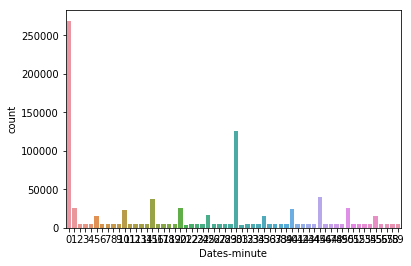

In [31]:
sns.countplot(data = train, x = "Dates-minute")

In [32]:
import numpy as np

train["Dates-minute(abs)"] = np.abs(train["Dates-minute"] - 30)
test["Dates-minute(abs)"] = np.abs(test["Dates-minute"] - 30)

print(train.shape)

train[["Dates-minute", "Dates-minute(abs)"]].head()

(878049, 37)


,Dates-minute,Dates-minute(abs)
0,53,23
1,53,23
2,33,3
3,30,0
4,30,0


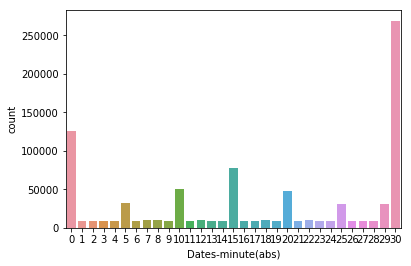

In [33]:
sns.countplot(data = train, x = "Dates-minute(abs)")

### Machine Learning Model Preprocessing

In [34]:
feature_names = ["X", "Y", "Crossroad"]

feature_names = feature_names + ["Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute(abs)"]
# "Weekend_FS", "Weekend_SS"

feature_names = feature_names + list(train_dayofweek.columns)
feature_names = feature_names + list(train_pddistrict.columns)

label_name = "Category"
feature_names


['X',
 'Y',
 'Crossroad',
 'Dates-year',
 'Dates-month',
 'Dates-day',
 'Dates-hour',
 'Dates-minute(abs)',
 'DayOfWeek_Friday',
 'DayOfWeek_Monday',
 'DayOfWeek_Saturday',
 'DayOfWeek_Sunday',
 'DayOfWeek_Thursday',
 'DayOfWeek_Tuesday',
 'DayOfWeek_Wednesday',
 'PdDistrict_BAYVIEW',
 'PdDistrict_CENTRAL',
 'PdDistrict_INGLESIDE',
 'PdDistrict_MISSION',
 'PdDistrict_NORTHERN',
 'PdDistrict_PARK',
 'PdDistrict_RICHMOND',
 'PdDistrict_SOUTHERN',
 'PdDistrict_TARAVAL',
 'PdDistrict_TENDERLOIN']

In [35]:
X_train = train[feature_names]

print(X_train.shape)

X_train.head()

(878049, 25)


,X,Y,Crossroad,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute(abs),DayOfWeek_Friday,DayOfWeek_Monday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.425892,37.774599,True,2015,5,13,23,23,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-122.425892,37.774599,True,2015,5,13,23,23,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-122.424363,37.800414,True,2015,5,13,23,3,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-122.426995,37.800873,False,2015,5,13,23,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-122.438738,37.771541,False,2015,5,13,23,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
# compress train and train_address together

from scipy.sparse import hstack

X_train = hstack([X_train.astype('float'), train_address])

X_train = csr_matrix(X_train)

X_train

<878049x1745 sparse matrix of type '<class 'numpy.float64'>'
	with 8871270 stored elements in Compressed Sparse Row format>

In [37]:
test.columns

Index(['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y',
       'Dates-year', 'Dates-month', 'Dates-day', 'Dates-hour', 'Dates-minute',
       'Dates-second', 'Crossroad', 'Weekend_FS', 'Weekend_SS',
       'DayOfWeek_Friday', 'DayOfWeek_Monday', 'DayOfWeek_Saturday',
       'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday',
       'DayOfWeek_Wednesday', 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL',
       'PdDistrict_INGLESIDE', 'PdDistrict_MISSION', 'PdDistrict_NORTHERN',
       'PdDistrict_PARK', 'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN',
       'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN', 'Address(clean)',
       'Dates-minute(abs)'],
      dtype='object')

In [38]:
X_test = test[feature_names]

print(X_test.shape)

X_test.head()

(884262, 25)


,X,Y,Crossroad,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute(abs),DayOfWeek_Friday,DayOfWeek_Monday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.399588,37.735051,False,2015,5,10,23,29,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-122.391523,37.732432,True,2015,5,10,23,21,0,0,...,1,0,0,0,0,0,0,0,0,0
2,-122.426002,37.792212,False,2015,5,10,23,20,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-122.437394,37.721412,False,2015,5,10,23,15,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-122.437394,37.721412,False,2015,5,10,23,15,0,0,...,0,0,1,0,0,0,0,0,0,0


In [39]:
X_test = hstack([X_test.astype('float'), test_address])

X_test = csr_matrix(X_test)

X_test

<884262x1745 sparse matrix of type '<class 'numpy.float64'>'
	with 8931799 stored elements in Compressed Sparse Row format>

In [40]:

y_train = train[label_name]

print(y_train.shape)

y_train.head()

(878049,)


0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

### Hyperparameter Tuning By Random Search

1. Coarse Search
2. Finer Search

### Coarse Search

In [41]:
from tqdm import tqdm, trange
import numpy as np

from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split


from sklearn.metrics import log_loss

X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
    train_test_split(X_train, y_train, test_size = 0.3, random_state = 37)


n_estimators = 100


num_loop = 100


early_stopping_rounds = 20

# coarse_hyperparameters_list
coarse_hyperparameters_list = []

# num_loop 
for loop in tqdm(range(num_loop)):

    learning_rate = 10 ** np.random.uniform(low = -10, high = 1)
    num_leaves = np.random.randint(2, 500)
    max_bin = np.random.randint(2, 500)
    min_child_samples = np.random.randint(2, 500) 
    subsample = np.random.uniform(low = 0.1, high = 1.0)
    colsample_bytree = np.random.uniform(low = 0.1, high = 1.0)
    
    # LGBMClassifier
    model = LGBMClassifier(n_estimators = n_estimators,
                           learning_rate = learning_rate,
                           num_leaves = num_leaves,
                           max_bin = max_bin,
                           min_child_samples = min_child_samples,
                           subsample = subsample,
                           subsample_freq = 1,
                           colsample_bytree = colsample_bytree,
                           class_type = 'balanced',
                           random_state = 37)
    
    # early-stopping
    model.fit(X_train_kf, y_train_kf,
              eval_set = [(X_test_kf, y_test_kf)],
              verbose = 0,
              early_stopping_rounds = early_stopping_rounds)

    #  n_estimators
    best_iteration = model.best_iteration_
    score = model.best_score_['valid_0']['multi_logloss']
    
    # hyperparameter 
    coarse_hyperparameters_list.append({
        'loop': loop,
        'n_estimators': best_iteration,
        'learning_rate': learning_rate,
        'num_leaves': num_leaves,
        'max_bin': max_bin,
        'min_child_samples': min_child_samples,
        'subsample': subsample,
        'subsample_freq': 1,
        'colsample_bytree': colsample_bytree,
        'class_type': 'balanced',
        'random_state': 37,
        'score': score,
    })

    # hyperparameter 
    print(f"{loop:2} best iteration = {best_iteration} Score = {score:.5f}")
    
# coarse_hyperparameters_list -> Pandas DataFrame
coarse_hyperparameters_list = pd.DataFrame(coarse_hyperparameters_list)

# coarse_hyperparameters_list score
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by = "score")
    

coarse_hyperparameters_list.head()

/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
  1%|          | 1/100 [08:06<13:23:21, 486.89s/it]

 0 best iteration = 100 Score = 2.66713


  2%|▏         | 2/100 [13:37<11:58:27, 439.87s/it]

 1 best iteration = 100 Score = 2.63318


  3%|▎         | 3/100 [22:02<12:23:03, 459.63s/it]

 2 best iteration = 100 Score = 2.67597


  4%|▍         | 4/100 [31:58<13:20:31, 500.33s/it]

 3 best iteration = 100 Score = 2.66615


  5%|▌         | 5/100 [32:17<9:23:45, 356.06s/it] 

 4 best iteration = 1 Score = 17.33232


  6%|▌         | 6/100 [43:04<11:34:22, 443.22s/it]

 5 best iteration = 100 Score = 2.67825


  7%|▋         | 7/100 [52:24<12:21:20, 478.29s/it]

 6 best iteration = 100 Score = 2.29463


  8%|▊         | 8/100 [55:14<9:51:44, 385.92s/it] 

 7 best iteration = 39 Score = 2.35701


  9%|▉         | 9/100 [1:02:19<10:02:58, 397.56s/it]

 8 best iteration = 100 Score = 2.67609


 10%|█         | 10/100 [1:08:07<9:34:02, 382.70s/it]

 9 best iteration = 100 Score = 2.67826


 11%|█         | 11/100 [1:14:09<9:18:33, 376.56s/it]

10 best iteration = 100 Score = 2.57460


 12%|█▏        | 12/100 [1:21:10<9:31:35, 389.72s/it]

11 best iteration = 100 Score = 2.40129


 13%|█▎        | 13/100 [1:25:52<8:38:16, 357.43s/it]

12 best iteration = 100 Score = 2.67814


 14%|█▍        | 14/100 [1:36:01<10:20:48, 433.12s/it]

13 best iteration = 100 Score = 2.67826


 15%|█▌        | 15/100 [1:37:08<7:37:59, 323.28s/it] 

14 best iteration = 2 Score = 3.16441


 16%|█▌        | 16/100 [1:44:44<8:28:11, 362.99s/it]

15 best iteration = 100 Score = 2.67826


 17%|█▋        | 17/100 [1:45:02<5:58:58, 259.50s/it]

16 best iteration = 1 Score = 11.20846


 18%|█▊        | 18/100 [1:53:44<7:42:28, 338.39s/it]

17 best iteration = 100 Score = 2.67798


 19%|█▉        | 19/100 [1:57:58<7:02:31, 312.99s/it]

18 best iteration = 100 Score = 2.67825


 20%|██        | 20/100 [2:01:30<6:16:56, 282.70s/it]

19 best iteration = 100 Score = 2.67826


 21%|██        | 21/100 [2:11:46<8:23:38, 382.51s/it]

20 best iteration = 100 Score = 2.67826


 22%|██▏       | 22/100 [2:15:11<7:08:14, 329.42s/it]

21 best iteration = 100 Score = 2.67826


 23%|██▎       | 23/100 [2:19:58<6:46:26, 316.70s/it]

22 best iteration = 100 Score = 2.67684


 24%|██▍       | 24/100 [2:26:24<7:07:15, 337.31s/it]

23 best iteration = 100 Score = 2.59957


 25%|██▌       | 25/100 [2:41:23<10:32:31, 506.02s/it]

24 best iteration = 100 Score = 2.67826


 26%|██▌       | 26/100 [2:45:20<8:44:27, 425.24s/it] 

25 best iteration = 100 Score = 2.67824


 27%|██▋       | 27/100 [2:53:26<8:59:42, 443.59s/it]

26 best iteration = 100 Score = 2.67826


 28%|██▊       | 28/100 [2:55:28<6:56:24, 347.01s/it]

27 best iteration = 16 Score = 2.34801


 29%|██▉       | 29/100 [3:00:40<6:38:10, 336.48s/it]

28 best iteration = 100 Score = 2.67822


 30%|███       | 30/100 [3:00:53<4:39:26, 239.52s/it]

29 best iteration = 1 Score = 11.99219


 31%|███       | 31/100 [3:01:18<3:21:16, 175.03s/it]

30 best iteration = 1 Score = 8.14728


 32%|███▏      | 32/100 [3:09:22<5:03:38, 267.91s/it]

31 best iteration = 100 Score = 2.67430


 33%|███▎      | 33/100 [3:14:27<5:11:19, 278.80s/it]

32 best iteration = 100 Score = 2.67768


 34%|███▍      | 34/100 [3:18:26<4:53:34, 266.89s/it]

33 best iteration = 100 Score = 2.66578


 35%|███▌      | 35/100 [3:30:35<7:19:27, 405.66s/it]

34 best iteration = 100 Score = 2.67824


 36%|███▌      | 36/100 [3:30:51<5:07:57, 288.71s/it]

35 best iteration = 1 Score = 4.53112


 37%|███▋      | 37/100 [3:40:03<6:25:58, 367.60s/it]

36 best iteration = 100 Score = 2.40008


 38%|███▊      | 38/100 [3:44:07<5:41:31, 330.51s/it]

37 best iteration = 100 Score = 2.67822


 39%|███▉      | 39/100 [3:49:41<5:37:11, 331.66s/it]

38 best iteration = 100 Score = 2.67826


 40%|████      | 40/100 [3:54:28<5:18:15, 318.26s/it]

39 best iteration = 100 Score = 2.30186


 41%|████      | 41/100 [3:59:16<5:03:59, 309.15s/it]

40 best iteration = 100 Score = 2.43609


 42%|████▏     | 42/100 [3:59:29<3:33:00, 220.35s/it]

41 best iteration = 1 Score = 8.88644


 43%|████▎     | 43/100 [4:03:26<3:34:07, 225.39s/it]

42 best iteration = 100 Score = 2.63935


 44%|████▍     | 44/100 [4:08:28<3:51:53, 248.45s/it]

43 best iteration = 100 Score = 2.34500


 45%|████▌     | 45/100 [4:46:57<13:14:20, 866.56s/it]

44 best iteration = 100 Score = 2.32241


 46%|████▌     | 46/100 [4:55:52<11:30:11, 766.88s/it]

45 best iteration = 100 Score = 2.55399


 47%|████▋     | 47/100 [5:00:28<9:07:18, 619.60s/it] 

46 best iteration = 100 Score = 2.67783


 48%|████▊     | 48/100 [5:07:21<8:03:21, 557.71s/it]

47 best iteration = 100 Score = 2.67500


 49%|████▉     | 49/100 [5:10:49<6:24:55, 452.85s/it]

48 best iteration = 100 Score = 2.67820


 50%|█████     | 50/100 [5:16:37<5:51:13, 421.46s/it]

49 best iteration = 100 Score = 2.67826


 51%|█████     | 51/100 [5:22:03<5:20:48, 392.83s/it]

50 best iteration = 100 Score = 2.67825


 52%|█████▏    | 52/100 [5:27:33<4:59:14, 374.05s/it]

51 best iteration = 100 Score = 2.67826


 53%|█████▎    | 53/100 [5:33:12<4:44:45, 363.53s/it]

52 best iteration = 100 Score = 2.67350


 54%|█████▍    | 54/100 [5:46:01<6:11:51, 485.03s/it]

53 best iteration = 100 Score = 2.57612


 55%|█████▌    | 55/100 [5:51:08<5:23:49, 431.76s/it]

54 best iteration = 100 Score = 2.67826


 56%|█████▌    | 56/100 [6:01:49<6:02:37, 494.48s/it]

55 best iteration = 100 Score = 2.67826


 57%|█████▋    | 57/100 [6:08:35<5:35:11, 467.72s/it]

56 best iteration = 100 Score = 2.59122


 58%|█████▊    | 58/100 [6:15:57<5:22:09, 460.21s/it]

57 best iteration = 100 Score = 2.67684


 59%|█████▉    | 59/100 [6:26:41<5:52:00, 515.14s/it]

58 best iteration = 100 Score = 2.67826


 60%|██████    | 60/100 [6:36:30<5:58:12, 537.32s/it]

59 best iteration = 71 Score = 2.24982


 61%|██████    | 61/100 [6:42:47<5:17:58, 489.20s/it]

60 best iteration = 100 Score = 2.29711


 62%|██████▏   | 62/100 [6:45:35<4:08:54, 393.01s/it]

61 best iteration = 100 Score = 2.67826


 63%|██████▎   | 63/100 [6:51:16<3:52:47, 377.51s/it]

62 best iteration = 100 Score = 2.67826


 64%|██████▍   | 64/100 [6:56:39<3:36:39, 361.09s/it]

63 best iteration = 100 Score = 2.67493


 65%|██████▌   | 65/100 [7:03:36<3:40:23, 377.82s/it]

64 best iteration = 100 Score = 2.66462


 66%|██████▌   | 66/100 [7:09:41<3:31:52, 373.91s/it]

65 best iteration = 100 Score = 2.67826


 67%|██████▋   | 67/100 [7:15:57<3:26:01, 374.59s/it]

66 best iteration = 100 Score = 2.67825


 68%|██████▊   | 68/100 [7:22:12<3:19:50, 374.71s/it]

67 best iteration = 100 Score = 2.67821


 69%|██████▉   | 69/100 [9:01:52<17:42:25, 2056.32s/it]

68 best iteration = 100 Score = 2.59942


 70%|███████   | 70/100 [9:09:37<13:09:28, 1578.96s/it]

69 best iteration = 100 Score = 2.67826


 71%|███████   | 71/100 [9:19:45<10:22:23, 1287.69s/it]

70 best iteration = 100 Score = 2.65310


 72%|███████▏  | 72/100 [9:20:02<7:02:59, 906.40s/it]  

71 best iteration = 2 Score = 5.99658


 73%|███████▎  | 73/100 [9:21:41<4:58:52, 664.15s/it]

72 best iteration = 2 Score = 2.89658


 74%|███████▍  | 74/100 [9:27:46<4:08:54, 574.39s/it]

73 best iteration = 100 Score = 2.67826


 75%|███████▌  | 75/100 [9:43:28<4:45:15, 684.62s/it]

74 best iteration = 100 Score = 2.30620


 76%|███████▌  | 76/100 [9:47:48<3:42:52, 557.20s/it]

75 best iteration = 100 Score = 2.67826


 77%|███████▋  | 77/100 [10:00:07<3:54:34, 611.94s/it]

76 best iteration = 100 Score = 2.67826


 78%|███████▊  | 78/100 [10:00:28<2:39:20, 434.57s/it]

77 best iteration = 1 Score = 9.75796


 79%|███████▉  | 79/100 [10:09:29<2:43:14, 466.39s/it]

78 best iteration = 100 Score = 2.61949


 80%|████████  | 80/100 [10:21:11<2:59:05, 537.27s/it]

79 best iteration = 100 Score = 2.59206


 81%|████████  | 81/100 [10:21:29<2:00:48, 381.51s/it]

80 best iteration = 1 Score = 19.24223


 82%|████████▏ | 82/100 [10:24:20<1:35:28, 318.23s/it]

81 best iteration = 100 Score = 2.67823


 83%|████████▎ | 83/100 [10:26:24<1:13:37, 259.87s/it]

82 best iteration = 100 Score = 2.67826


 84%|████████▍ | 84/100 [10:34:16<1:26:18, 323.66s/it]

83 best iteration = 100 Score = 2.67826


 85%|████████▌ | 85/100 [10:39:47<1:21:26, 325.79s/it]

84 best iteration = 100 Score = 2.67008


 86%|████████▌ | 86/100 [10:44:22<1:12:28, 310.60s/it]

85 best iteration = 100 Score = 2.67826


 87%|████████▋ | 87/100 [10:49:25<1:06:49, 308.39s/it]

86 best iteration = 100 Score = 2.42159


 88%|████████▊ | 88/100 [11:00:33<1:23:13, 416.10s/it]

87 best iteration = 100 Score = 2.66450


 89%|████████▉ | 89/100 [11:05:10<1:08:40, 374.56s/it]

88 best iteration = 100 Score = 2.67785


 90%|█████████ | 90/100 [11:11:27<1:02:31, 375.11s/it]

89 best iteration = 76 Score = 2.28540


 91%|█████████ | 91/100 [11:16:24<52:46, 351.78s/it]  

90 best iteration = 100 Score = 2.67823


 92%|█████████▏| 92/100 [11:20:54<43:39, 327.38s/it]

91 best iteration = 100 Score = 2.67826


 93%|█████████▎| 93/100 [11:21:54<28:48, 246.95s/it]

92 best iteration = 2 Score = 3.87655


 94%|█████████▍| 94/100 [11:26:01<24:41, 246.91s/it]

93 best iteration = 100 Score = 2.67826


 95%|█████████▌| 95/100 [11:31:57<23:19, 279.81s/it]

94 best iteration = 100 Score = 2.66284


 96%|█████████▌| 96/100 [11:38:49<21:17, 319.36s/it]

95 best iteration = 100 Score = 2.66349


 97%|█████████▋| 97/100 [11:44:24<16:12, 324.06s/it]

96 best iteration = 100 Score = 2.67698


 98%|█████████▊| 98/100 [11:48:45<10:10, 305.07s/it]

97 best iteration = 100 Score = 2.67826


 99%|█████████▉| 99/100 [11:54:50<05:23, 323.03s/it]

98 best iteration = 100 Score = 2.66765


100%|██████████| 100/100 [11:56:09<00:00, 249.94s/it]

99 best iteration = 6 Score = 2.76354


,class_type,colsample_bytree,learning_rate,loop,max_bin,min_child_samples,n_estimators,num_leaves,random_state,score,subsample,subsample_freq
59,balanced,0.920644,0.081003,59,267,447,71,489,37,2.249816,0.642256,1
89,balanced,0.980669,0.049037,89,117,105,76,307,37,2.285402,0.249835,1
6,balanced,0.817183,0.043684,6,19,55,100,379,37,2.294634,0.174221,1
60,balanced,0.386426,0.049455,60,182,350,100,320,37,2.297113,0.406778,1
39,balanced,0.300941,0.072509,39,349,464,100,400,37,2.301862,0.257573,1


In [42]:
# Coars search
best_hyperparameters = coarse_hyperparameters_list.iloc[0]

#  best_hyperparameters
best_hyperparameters

class_type            balanced
colsample_bytree      0.920644
learning_rate        0.0810027
loop                        59
max_bin                    267
min_child_samples          447
n_estimators                71
num_leaves                 489
random_state                37
score                  2.24982
subsample             0.642256
subsample_freq               1
Name: 59, dtype: object

### Random Forest ML Model

In [46]:
#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(n_estimators = 20,
#                              n_jobs = -1,
#                              random_state = 1)
#model

### Lightgbm ML Model

In [47]:
from lightgbm import LGBMClassifier


model = LGBMClassifier(n_estimators = best_hyperparameters['n_estimators'],
                       learning_rate = best_hyperparameters['learning_rate'],
                       num_leaves = best_hyperparameters['num_leaves'],
                       max_bin = best_hyperparameters['max_bin'],
                       min_child_samples = best_hyperparameters['min_child_samples'],
                       subsample = best_hyperparameters['subsample'],
                       subsample_freq = best_hyperparameters['subsample_freq'],
                       colsample_bytree = best_hyperparameters['colsample_bytree'],
                       class_type = best_hyperparameters['class_type'],
                       random_state = best_hyperparameters['random_state'])

model

LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
        colsample_bytree=0.9206437103001572, importance_type='split',
        learning_rate=0.08100268503052448, max_bin=267, max_depth=-1,
        min_child_samples=447, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=71, n_jobs=-1, num_leaves=489, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.6422555708777794, subsample_for_bin=200000,
        subsample_freq=1)

### Test ML Model

In [48]:

from sklearn.model_selection import train_test_split


X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
    train_test_split(X_train, y_train, test_size = 0.3, random_state = 37)

print(X_train_kf.shape, y_train_kf.shape)

print(X_test_kf.shape, y_test_kf.shape)

(614634, 1745) (614634,)
(263415, 1745) (263415,)


In [49]:
%time model.fit(X_train_kf, y_train_kf)

CPU times: user 21min 25s, sys: 3.79 s, total: 21min 28s
Wall time: 5min 37s


LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
        colsample_bytree=0.9206437103001572, importance_type='split',
        learning_rate=0.08100268503052448, max_bin=267, max_depth=-1,
        min_child_samples=447, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=71, n_jobs=-1, num_leaves=489, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.6422555708777794, subsample_for_bin=200000,
        subsample_freq=1)

In [50]:

y_predict_test_kf = model.predict_proba(X_test_kf)


print(y_predict_test_kf.shape)

y_predict_test_kf

(263415, 39)


array([[2.19205883e-03, 6.17027015e-02, 2.72072238e-05, ...,
        4.67921623e-03, 2.60109181e-02, 6.62771536e-03],
       [3.32523777e-04, 6.03131640e-02, 2.33159088e-04, ...,
        1.11537479e-01, 5.59146150e-03, 1.36723677e-03],
       [4.97978898e-04, 7.93001060e-02, 1.09564185e-04, ...,
        1.20833339e-02, 4.74423514e-02, 6.45151976e-03],
       ...,
       [1.03070977e-03, 7.17106451e-02, 7.88591406e-05, ...,
        1.33244294e-01, 1.53657032e-02, 3.61940430e-03],
       [1.70917873e-03, 4.25580899e-02, 9.18490461e-04, ...,
        6.29211564e-02, 1.44479171e-02, 5.20489693e-03],
       [4.25368444e-04, 1.07486419e-01, 1.42521981e-04, ...,
        4.02755275e-02, 9.21282920e-02, 9.70257549e-03]])

### Evaluation Formula

$$
Log  Loss = -\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^My_{ij}\log(p_{ij})
$$

In [51]:

from sklearn.metrics import log_loss


score = log_loss(y_test_kf, y_predict_test_kf)

print(f"Score = {score:.5f}")

Score = 2.24982


In [52]:
print("The socre is a top ", (score / 2200)*100, "%")

The socre is a top  0.1022643761456771 %


### Final Prediction Ouput By using 

In [53]:
# Prediction
%time model.fit(X_train, y_train)


prediction_list = model.predict_proba(X_test)

print(prediction_list.shape)

prediction_list

CPU times: user 27min 39s, sys: 4.68 s, total: 27min 44s
Wall time: 7min 15s
(884262, 39)


array([[1.11237233e-03, 1.16844589e-01, 2.60326484e-05, ...,
        1.23769943e-01, 3.62268436e-02, 8.60981363e-02],
       [7.97943482e-04, 4.31969749e-02, 1.67974063e-05, ...,
        1.23366596e-02, 1.16120996e-01, 3.12475365e-02],
       [5.51937604e-03, 1.03917752e-01, 3.80888201e-05, ...,
        3.93144912e-02, 2.39261537e-02, 1.17697523e-02],
       ...,
       [6.89226907e-04, 1.16760924e-01, 2.98798165e-03, ...,
        6.42195082e-02, 1.51224424e-02, 3.85998835e-03],
       [1.41517108e-03, 7.22189236e-02, 9.62429048e-03, ...,
        8.45380487e-02, 1.13528293e-02, 8.22945799e-03],
       [1.79339641e-03, 8.33722821e-02, 6.10469458e-03, ...,
        6.10188163e-02, 1.27420435e-02, 2.19694985e-03]])

In [54]:

sample_submission = pd.read_csv("data/sampleSubmission.csv", index_col = "Id")

submission = pd.DataFrame(prediction_list,
                          index = sample_submission.index,
                          columns = model.classes_)



submission.to_csv("sf-crime.csv")

submission.head()

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.001112,0.116845,0.000026,0.000171,0.034141,0.001490,0.007680,0.027186,0.002076,0.000766,...,0.000117,0.008271,0.000055,0.055146,2.605947e-07,0.005125,0.052703,0.123770,0.036227,0.086098
1,0.000798,0.043197,0.000017,0.000057,0.002458,0.001636,0.011143,0.098840,0.005475,0.000275,...,0.000011,0.007566,0.000106,0.036129,6.516406e-08,0.000547,0.017108,0.012337,0.116121,0.031248
2,0.005519,0.103918,0.000038,0.000093,0.101081,0.001271,0.002335,0.022806,0.003356,0.000288,...,0.000016,0.016253,0.000088,0.037292,3.378074e-07,0.023526,0.075914,0.039314,0.023926,0.011770
3,0.005985,0.177517,0.000034,0.000542,0.032477,0.003351,0.003399,0.027096,0.009788,0.000220,...,0.000013,0.010818,0.000170,0.057079,2.791881e-07,0.009619,0.072139,0.050254,0.041729,0.018235
4,0.005985,0.177517,0.000034,0.000542,0.032477,0.003351,0.003399,0.027096,0.009788,0.000220,...,0.000013,0.010818,0.000170,0.057079,2.791881e-07,0.009619,0.072139,0.050254,0.041729,0.018235


In [59]:
submission.columns

Index(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC',
       'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES',
       'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING',
       'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON',
       'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT',
       'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY',
       'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE',
       'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS',
       'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS'],
      dtype='object')

In [61]:
pd.DataFrame(prediction_list,
                         index = sample_submission.index,
                          columns = submission.columns)

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.001112,0.116845,0.000026,0.000171,0.034141,0.001490,0.007680,0.027186,0.002076,0.000766,...,0.000117,0.008271,0.000055,0.055146,2.605947e-07,0.005125,0.052703,0.123770,0.036227,0.086098
1,0.000798,0.043197,0.000017,0.000057,0.002458,0.001636,0.011143,0.098840,0.005475,0.000275,...,0.000011,0.007566,0.000106,0.036129,6.516406e-08,0.000547,0.017108,0.012337,0.116121,0.031248
2,0.005519,0.103918,0.000038,0.000093,0.101081,0.001271,0.002335,0.022806,0.003356,0.000288,...,0.000016,0.016253,0.000088,0.037292,3.378074e-07,0.023526,0.075914,0.039314,0.023926,0.011770
3,0.005985,0.177517,0.000034,0.000542,0.032477,0.003351,0.003399,0.027096,0.009788,0.000220,...,0.000013,0.010818,0.000170,0.057079,2.791881e-07,0.009619,0.072139,0.050254,0.041729,0.018235
4,0.005985,0.177517,0.000034,0.000542,0.032477,0.003351,0.003399,0.027096,0.009788,0.000220,...,0.000013,0.010818,0.000170,0.057079,2.791881e-07,0.009619,0.072139,0.050254,0.041729,0.018235
5,0.003839,0.055126,0.000019,0.000111,0.002732,0.001572,0.004583,0.020760,0.007511,0.000200,...,0.000008,0.002900,0.000043,0.028529,1.720453e-07,0.000707,0.027436,0.020495,0.044565,0.010666
6,0.001063,0.064066,0.000037,0.000065,0.095812,0.001178,0.000905,0.007391,0.001402,0.000202,...,0.000011,0.003087,0.000083,0.024147,2.400056e-07,0.005670,0.052662,0.311836,0.007262,0.004183
7,0.001149,0.058497,0.000025,0.000241,0.055970,0.001596,0.000829,0.007201,0.001923,0.000128,...,0.000012,0.001960,0.000074,0.025238,2.261602e-07,0.004534,0.057938,0.373783,0.007678,0.003885
8,0.003479,0.204005,0.000037,0.000150,0.020753,0.013224,0.020227,0.048466,0.007089,0.000710,...,0.000015,0.003896,0.000056,0.044671,3.941695e-07,0.009034,0.090449,0.011808,0.051109,0.024951
